In [35]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import shapely

# 1. load urban/rural data

In [36]:
df= pd.read_csv('census_zipcode/urban_rural_zipcode.csv')

master_data = gpd.read_file('census_zipcode/central_valley_zip.shp')


all_zipcodes = master_data['Zipcode'].astype('int').unique()

urban=[]


for  zipcode in all_zipcodes:
    
    temp_df= df[df['Zipcode']==zipcode]
    if len(temp_df)>0:
        if temp_df['Urban'].values[0]: 
            urban+=['Urban']
        else:
            urban+=['Rural']
    else:
        urban+=[np.nan]
    

print(len(urban))

372


# 2. convert zipcode boundaries to shapefile

In [37]:
# processing of raw data only has to be done once

# master_data = gpd.read_file('tl_2016_us_zcta510/tl_2016_us_zcta510.shp')
# master_data.head()

# zipcode_filtered= master_data[master_data['ZCTA5CE10'].astype(int).isin(all_zipcodes)]
# zipcode_filtered.to_file('zipcode_polygon.shp')

# 3. combine 1. and 2. into a dataframe

In [38]:
master_data['Urban']=np.nan

zip_dict = {all_zipcodes[i]:urban[i] for i in range(len(urban))}

for i in range(len(master_data)):
    master_data.loc[i, 'Urban']= zip_dict[int(master_data.loc[i,'Zipcode'])]
    
    

In [39]:
master_data.head()

Zipcode                                           geometry  Urban
0   94514  POLYGON ((-137798.626 -21072.462, -137753.179 ...  Rural
1   95669  POLYGON ((-87179.121 56293.050, -87172.122 562...  Rural
2   95901  MULTIPOLYGON (((-124077.016 149359.370, -12404...  Rural
3   95974  POLYGON ((-160902.018 163396.734, -160934.773 ...  Rural
4   95979  POLYGON ((-229918.232 136775.281, -229954.603 ...  Rural

# 4. plot 

In [45]:
df_UCD = pd.read_csv('UCD_zipcode_filtered.csv')


UCD_zipcodes = df_UCD['Zipcode'].unique()
UCD_zipcodes= master_data[master_data['Zipcode'].astype('int').isin(UCD_zipcodes)]
UCD_area = shapely.ops.unary_union(UCD_zipcodes['geometry'].values)
UCD_gdf = gpd.GeoDataFrame({'index':[0], 'geometry':[UCD_area]}, crs = master_data.crs)
UCD_gdf.head()

index                                           geometry
0      0  MULTIPOLYGON (((18912.726 -247445.302, 18926.6...

In [46]:
central_valley_image= rasterio.open('Central_Valley.tif')
print(central_valley_image.crs)


EPSG:4326


(34.0, 42.0)

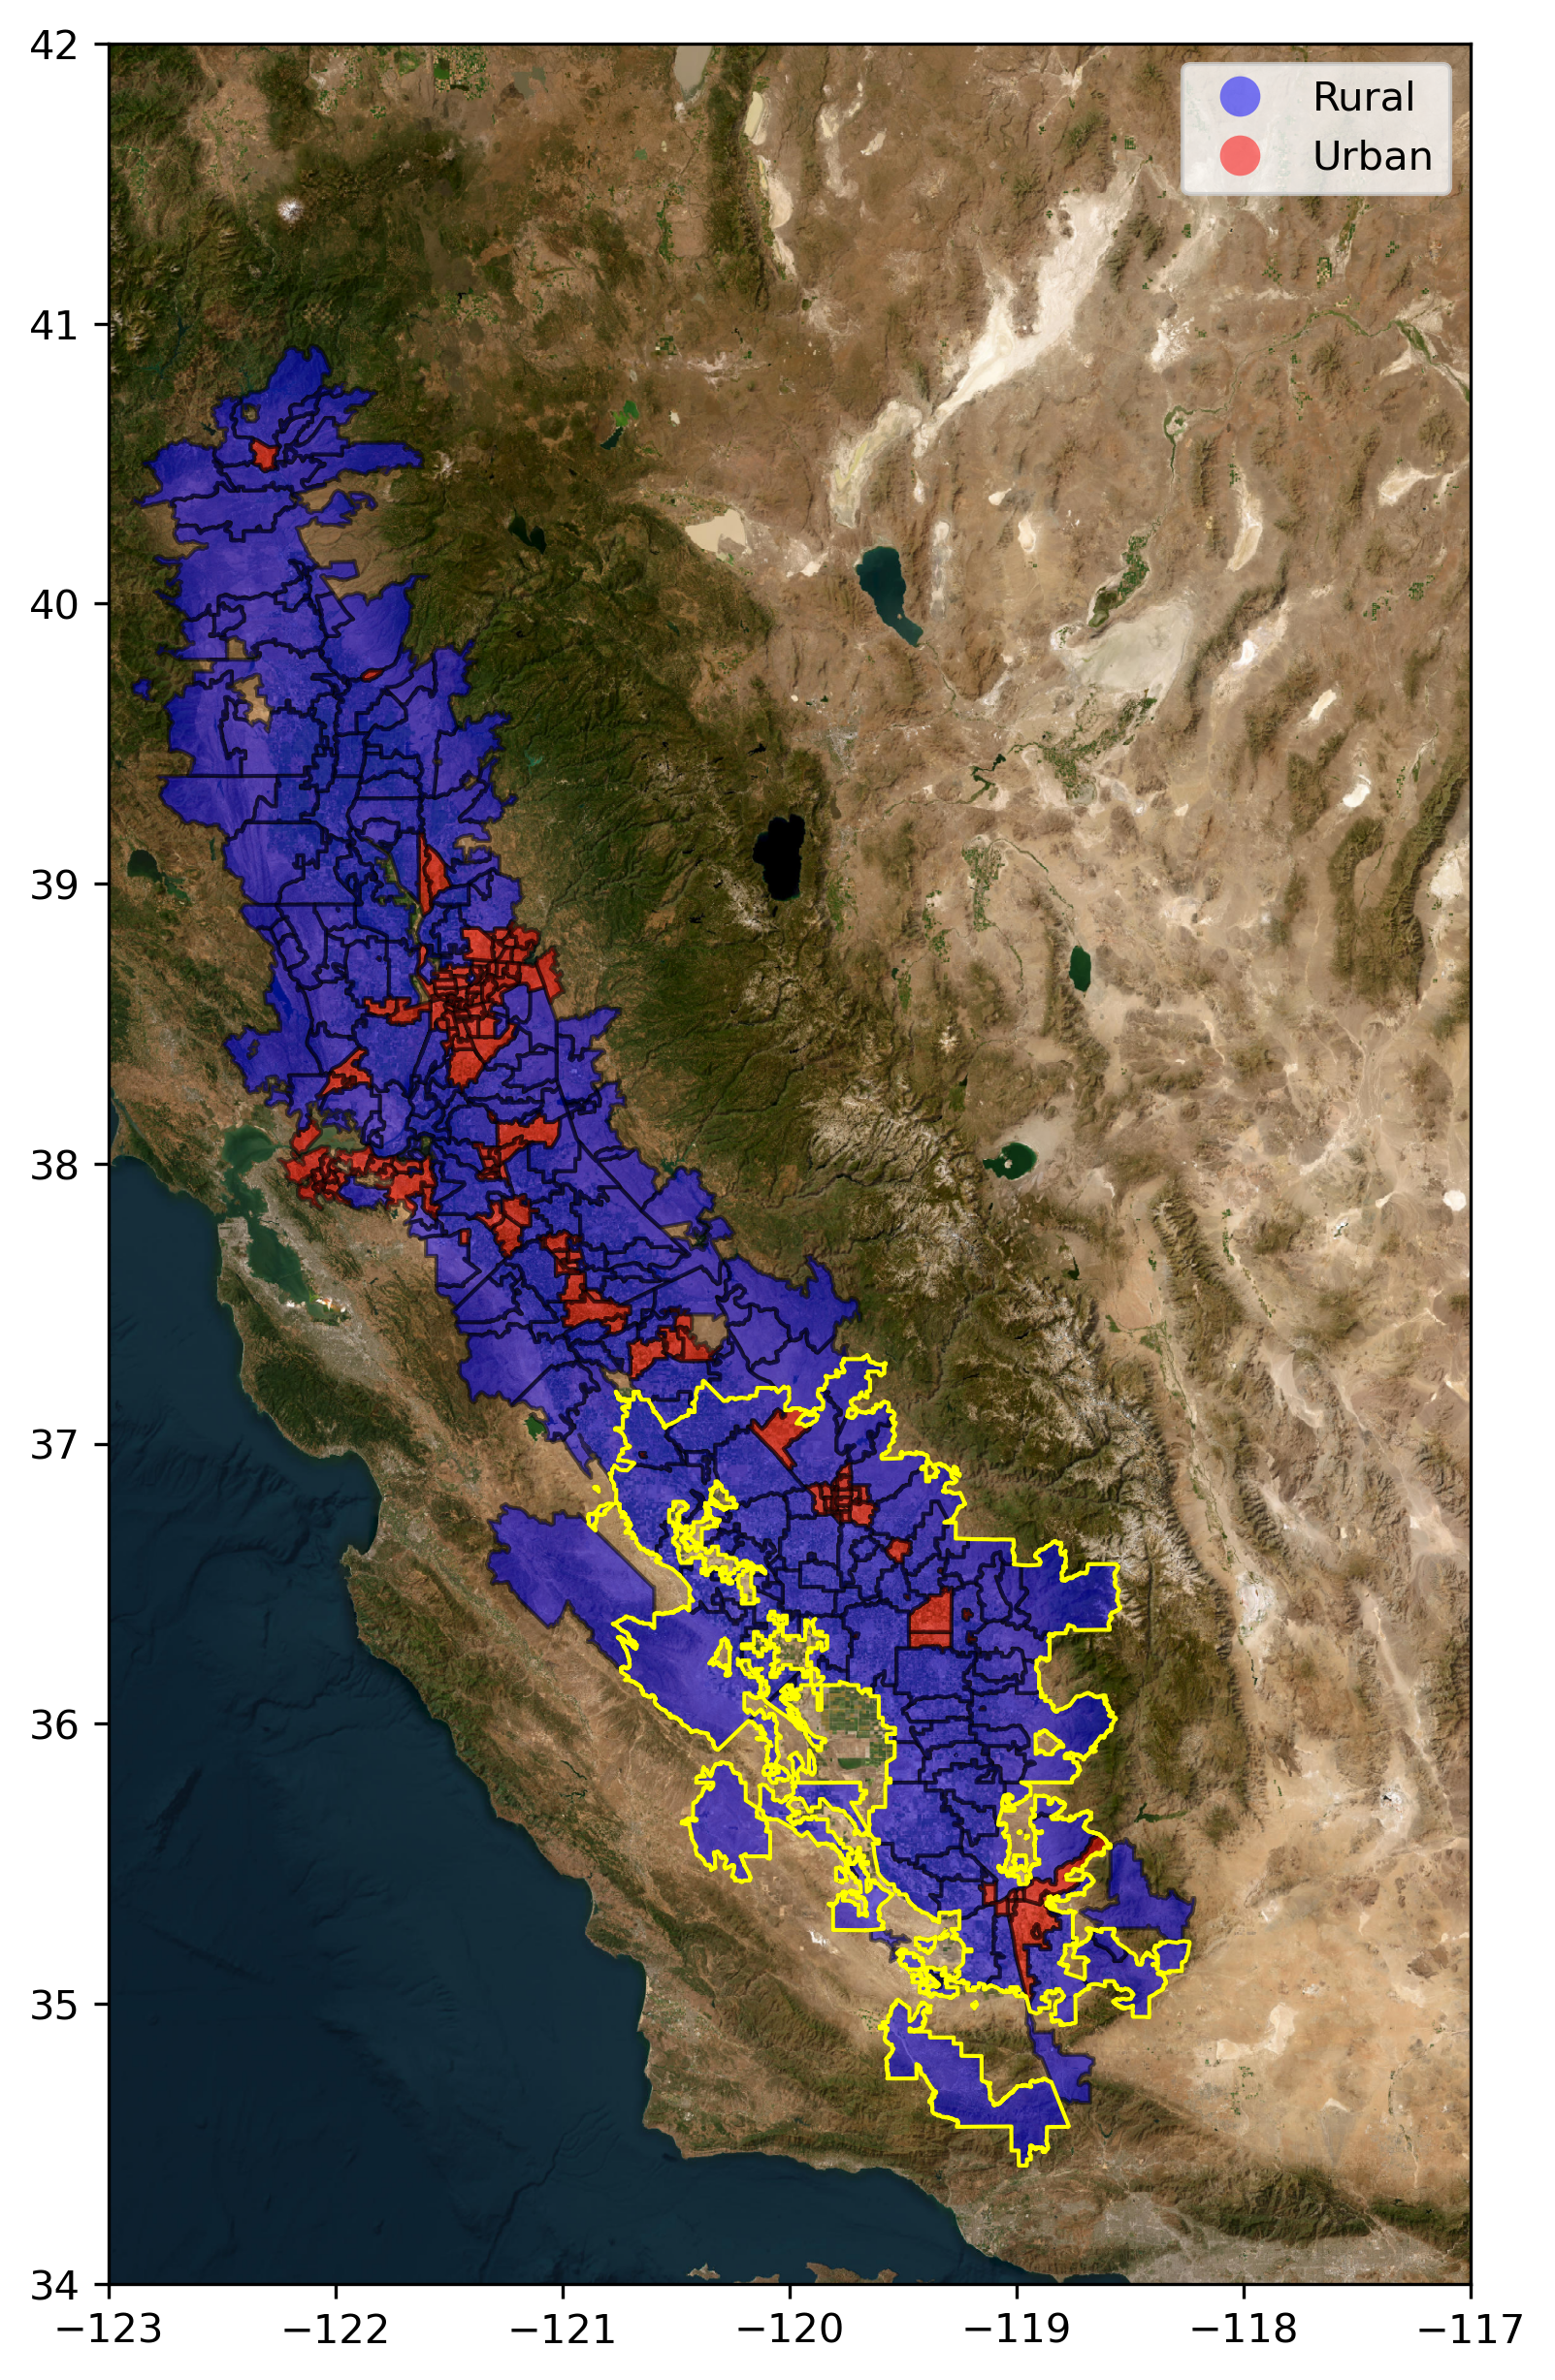

In [61]:


fig, ax=plt.subplots(figsize=(10,10), dpi= 300)
rasterio.plot.show(central_valley_image.read(), ax= ax,transform = central_valley_image.transform)
master_data.to_crs(central_valley_image.crs).plot('Urban', cmap='bwr', legend= True, ax=ax, alpha =0.5, edgecolor='black')                                                 
UCD_gdf.to_crs(central_valley_image.crs).plot( ax=ax, edgecolor = 'yellow',color = 'none')
plt.xlim(-123,-117)
plt.ylim(34,42)



In [19]:
master_data

Zipcode                                           geometry  Urban
0     94514  POLYGON ((-137798.626 -21072.462, -137753.179 ...  Rural
1     95669  POLYGON ((-87179.121 56293.050, -87172.122 562...  Rural
2     95901  MULTIPOLYGON (((-124077.016 149359.370, -12404...  Rural
3     95974  POLYGON ((-160902.018 163396.734, -160934.773 ...  Rural
4     95979  POLYGON ((-229918.232 136775.281, -229954.603 ...  Rural
..      ...                                                ...    ...
367   96092  POLYGON ((-176356.905 215439.683, -176379.456 ...  Rural
368   93274  POLYGON ((41676.488 -210615.494, 41675.583 -21...  Rural
369   95627  POLYGON ((-179765.377 72302.075, -179786.761 7...  Rural
370   95607  POLYGON ((-193956.110 99412.731, -193952.750 9...  Rural
371   95903  POLYGON ((-116157.916 119167.911, -116324.391 ...  Rural

[372 rows x 3 columns]